<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# Projeto Credit EDA and Analysis

Professor [Mariane Neiva](https://www.linkedin.com/in/mariane-neiva/)

Aluno [Denner Martins](https://www.linkedin.com/in/denner-martins-/)

---

# **Exploração e análise de dados de crédito com SQL**



# O PROJETO
Este projeto em SQL visa analisar dados de crédito bancário para entender padrões de comportamento financeiro e suporte ao crédito entre os clientes. Utilizando um banco de dados de transações, ele investiga variáveis como salários, gênero dos usuários e o valor máximo de crédito disponível. O foco é identificar fatores que influenciam o uso de crédito, criando insights para decisões de concessão de crédito mais informadas. Além disso, o projeto aborda a construção de consultas e visualizações que facilitam o acompanhamento de tendências e comportamentos de usuários no sistema bancário.



---

# **Os Dados**

Os dados representam informações de clientes de um banco e contam com as seguintes colunas:

idade = idade do cliente

sexo = sexo do cliente (F ou M)

dependentes = número de dependentes do cliente

escolaridade = nível de escolaridade do clientes

salario_anual = faixa salarial do cliente

tipo_cartao = tipo de cartao do cliente

qtd_produtos = quantidade de produtos comprados nos últimos 12 meses

iteracoes_12m = quantidade de iterações/transacoes nos ultimos 12 meses

meses_inativo_12m = quantidade de meses que o cliente ficou inativo

limite_credito = limite de credito do cliente

valor_transacoes_12m = valor das transações dos ultimos 12 meses

qtd_transacoes_12m = quantidade de transacoes dos ultimos 12 meses

A tabela foi criada no AWS Athena junto com o S3 Bucket com uma versão dos dados disponibilizados em: https://github.com/andre-marcos-perez/ebac-course-utils/tree/main/dataset

# **Criação da Tabelas e algumas Queries**



> **Não há necessidade de entrega**.
Para esses exercícios, utilizaremos os mesmo dados do módulo 3.

As informações de **credito8.csv** estarão disponíveis no material de aula.

Siga os seguintes passos para criação da tabela (desconsidere caso você já tenha os dados no seu S3):

* Crie uma pasta bucket-transacoes no seu S3 e carregue o arquivo **credito8.csv**
* Volta para o AWS Athena e execute o seguinte comando:

```sql
CREATE EXTERNAL TABLE IF NOT EXISTS default.credito (
  `idade` int,
  `sexo` string,
  `dependentes` int,
  `escolaridade` string,
  `estado_civil` string,
  `salario_anual` string,
  `tipo_cartao` string,
  `qtd_produtos` bigint,
  `iteracoes_12m` int,
  `meses_inativo_12m` int,
  `limite_credito` float,
  `valor_transacoes_12m` float,
  `qtd_transacoes_12m` int
)
ROW FORMAT SERDE 'org.apache.hadoop.hive.serde2.lazy.LazySimpleSerDe'
WITH SERDEPROPERTIES (
  'serialization.format' = ',',
  'field.delim' = ','
) LOCATION <sua-localizacao>
TBLPROPERTIES ('has_encrypted_data'='false');
```



# **Exploração de dados**

A primeira fase da análise é entender o que tem na nossa matéria prima. Vamos a exploração de dados:

**Qual a quantidade de informações temos na nossa base de dados?**

```sql
Query: SELECT count(*) FROM credito

Reposta: 2564 linhas
```

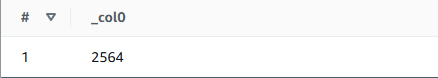

**Quais são esse dados?**

```sql
Query: SELECT * FROM credito LIMIT 10;


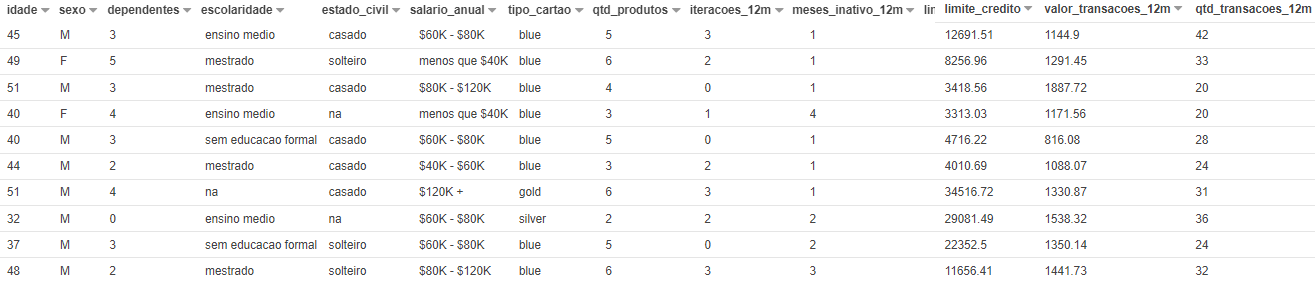

Ps: É possível notar que tem alguns valores nulos

# **Análise de Dados**

Segunda fase é analisar esses dados de uma forma completa e clara.

Bora para análise?!

**Será que a questão do sexo inlfuencia no limite de crédito?**

Quantos clientes são homens e quantos são mulheres?

```sql
Query:
select count(*), sexo from credito group by sexo


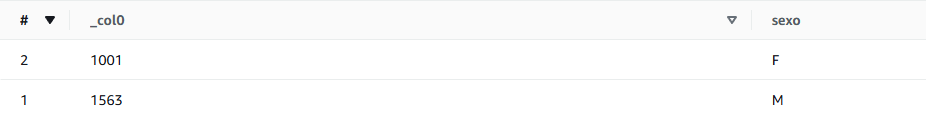

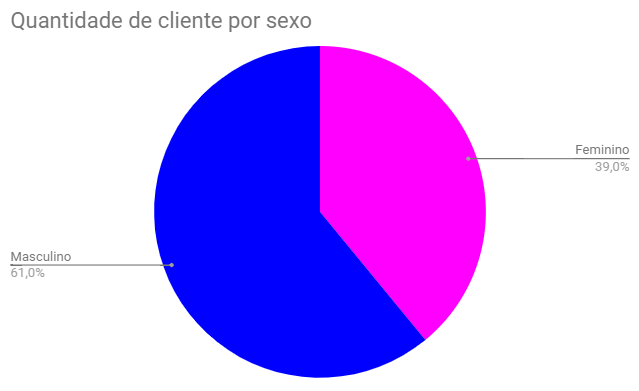

Insight: A maioria dos clientes desse banco é homem! Do csv extraído dos dados é possível gerar o gráfico em pizza com para melhor a proporção de masculino/feminino

**Vamos olhar os maiores limites de créditos!**



```sql
Query:
select max(limite_credito) as limite_credito, escolaridade, tipo_cartao, sexo from credito where escolaridade != 'na' and tipo_cartao != 'na' group by escolaridade, tipo_cartao, sexo order by limite_credito desc limit 10


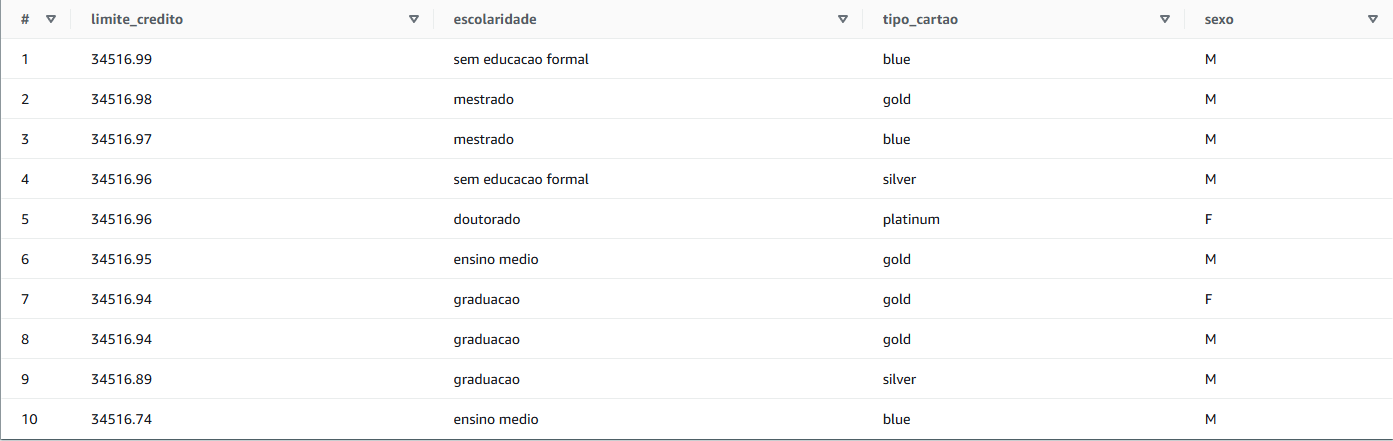

Agora vamos olhar os menores limites para tirarmos uma conclusão melhor.

```sql
Query:

select max(limite_credito) as limite_credito, escolaridade, tipo_cartao, sexo from credito where escolaridade != 'na' and tipo_cartao != 'na' group by escolaridade, tipo_cartao, sexo order by limite_credito asc


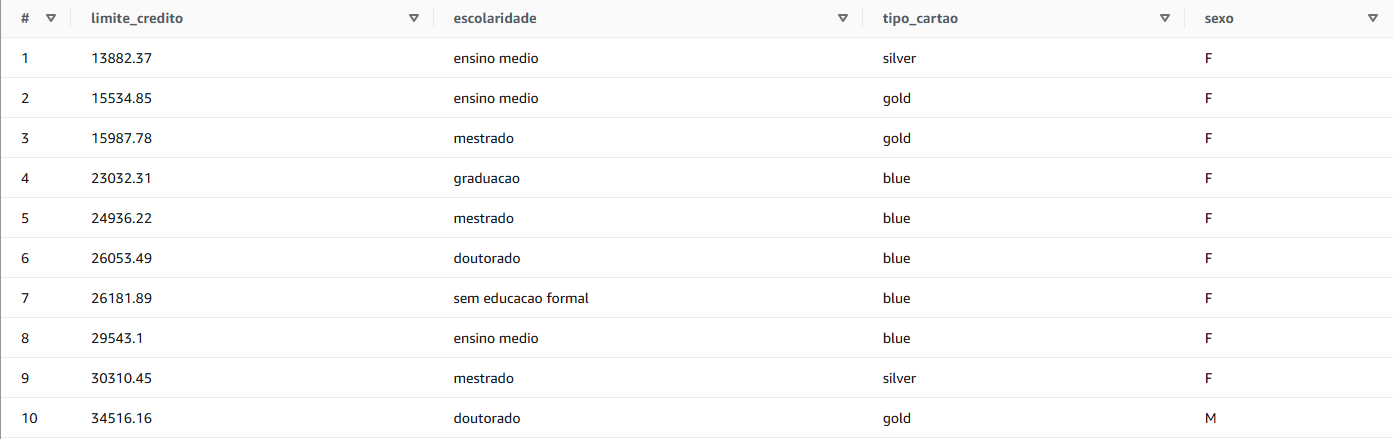

Insight 1:
É visívelmente notável que os maiores limites de crédito são para o **sexo masculino**, **apenas 3 do Top 10 maiores limites são mulheres** e no Top 10 menores créditos temos apenas 1 do sexo masculino.

Insight 2: A escolaridade não é um critério para ter limite alto ou menor, podemos ver que clientes **Sem educação formal** tem mais crédito que clientes com **Mestrado**.

**Qual sexo gasta mais créditos, Masculino ou Feminino?**

```sql
Query:
select max(valor_transacoes_12m) as maior_valor_gasto, avg(valor_transacoes_12m) as media_valor_gasto, min(valor_transacoes_12m) as min_valor_gasto, sexo from credito group by sexo


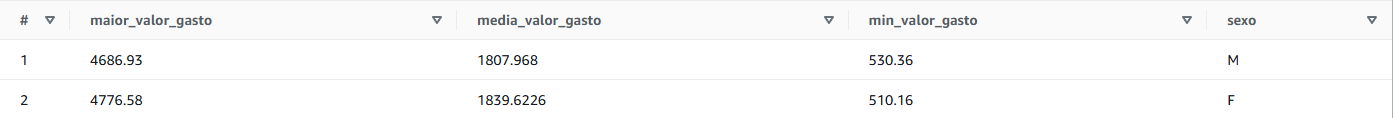

Insight 1: As mulheres gastam bem mais crédito que os homens.

Insight 2: Acho que seria uma boa aumentar os limites do sexo feminino para que tenha mais giro de crédito.

**Mas o que realmente impacta para gerar os Limites?**

**O salário impacta?**


```sql
Query:
select avg(qtd_produtos) as qts_produtos, avg(valor_transacoes_12m) as media_valor_transacoes, avg(limite_credito) as media_limite, sexo, salario_anual from credito where salario_anual != 'na' group by sexo, salario_anual order by avg(valor_transacoes_12m) desc


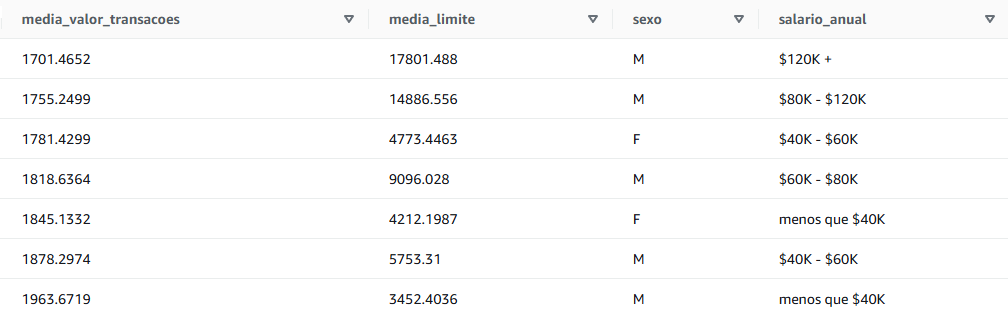

Insight 1: Sim, o salário impacta no limite de crédito, As pessoas que tem menor faixa salarial também apresentam menor limite de credito.

Insight 2: E é notável que o máximo de salário de uma mulher é de 40k - 60k.

# **Vamos fazer o Marketing!**

**Queremos focar o nosso marketing de maneira adequada para nossos clientes, qual será a idade deles?**

```sql
Query:
select avg(idade) as media_idade, min(idade) as min_idade, max(idade) as max_idade, sexo from credito group by sexo


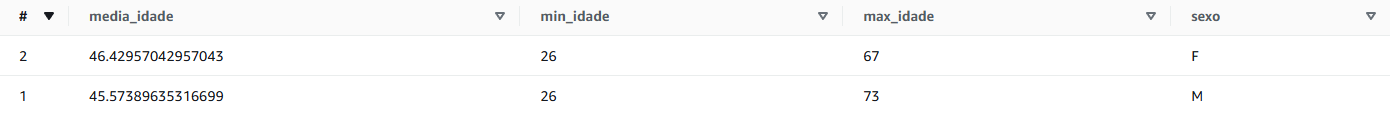

Insight 1: Por meio dessa análise não foi possível extrair nenhuma informação relevante. A menor idade dos dois sexos é a mesma e a média é muito similar. A unica diferença é a idade máxima mas fato quase irrelevante por a diferença não é tão gritante.

Insight 2: Podemos fazer o Marketing para ambos o sexos, lembrando que a maioria dos clientes são homens e um grande ponto é que o sexo feminino gasta mais em crédito.

# **Conclusão**

Ao concluir este projeto de análise de crédito em SQL, foi possível identificar padrões e tendências importantes no comportamento financeiro dos clientes. A partir da análise de dados de transações, salários, gênero e limites de crédito, desenvolvemos insights valiosos que oferecem suporte à tomada de decisões estratégicas na concessão de crédito. Os resultados destacam a importância de uma gestão baseada em dados, permitindo ao banco ajustar políticas de crédito, reduzir riscos e atender melhor as necessidades dos clientes. Este projeto reforça o impacto do SQL como ferramenta essencial para transformar dados brutos em soluções práticas e orientadas a resultados no setor bancário.

Alguns insights interessantes:

* A maior parte dos clientes possui renda até 40K
* A maior parte dos clientes é masculino!
* A escolaridade não parece influenciar no limite nem no tipo do cartão
* Os clientes com maiores limites são em sua maioria homens
* Os clientes com menores limites são em sua maioria mulheres
* Dentre os menores limites não há presença de cartão platinum
* A faixa salarial impacta diretamente no limite de crédito
* Não existem clientes com salário anual acima de 60K do sexo feminino



**Uma exploração maior dos dados pode explicar porque as mulheres tem menor crédito. Isso também pode ser um problema cultural que pode ser repensado!**



